In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Exploring

In [2]:
df_dvf = pd.read_csv('../raw_data/dvf.csv')

df_dvf.shape

/tmp/ipykernel_16137/1097798189.py:1: DtypeWarning: Columns (2,4,5,9,10,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dvf = pd.read_csv('../raw_data/dvf.csv')


(271360, 41)

In [3]:
df_dvf['code_departement']

0         93
1         93
2         93
3         93
4         93
          ..
271355    93
271356    93
271357    93
271358    93
271359    93
Name: code_departement, Length: 271360, dtype: object

In [4]:
df_dvf.duplicated().sum()

77094

In [5]:
df_dvf['nature_mutation'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

In [6]:
df_dvf['nature_mutation'].value_counts()

Vente                                 188594
Vente en l'état futur d'achèvement     78211
Adjudication                            2066
Expropriation                           1556
Echange                                  739
Vente terrain à bâtir                    189
nature_mutation                            5
Name: nature_mutation, dtype: int64

In [7]:
df_dvf.dtypes

id_mutation                     object
date_mutation                   object
numero_disposition              object
nature_mutation                 object
valeur_fonciere                 object
adresse_numero                  object
adresse_suffixe                 object
adresse_nom_voie                object
adresse_code_voie               object
code_postal                     object
code_commune                    object
nom_commune                     object
code_departement                object
ancien_code_commune             object
ancien_nom_commune              object
id_parcelle                     object
ancien_id_parcelle              object
numero_volume                   object
lot1_numero                     object
lot1_surface_carrez             object
lot2_numero                     object
lot2_surface_carrez             object
lot3_numero                     object
lot3_surface_carrez             object
lot4_numero                     object
lot4_surface_carrez      

In [8]:
df_dvf.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude',
       'section_prefixe'],
      dtype='object')

In [9]:
df_dvf.isnull().sum()

id_mutation                          0
date_mutation                        0
numero_disposition                   0
nature_mutation                      0
valeur_fonciere                   2591
adresse_numero                   29402
adresse_suffixe                 259219
adresse_nom_voie                 10195
adresse_code_voie                10195
code_postal                      10195
code_commune                         0
nom_commune                          0
code_departement                     0
ancien_code_commune             270288
ancien_nom_commune              270288
id_parcelle                          0
ancien_id_parcelle              271355
numero_volume                   269411
lot1_numero                      68751
lot1_surface_carrez             226795
lot2_numero                     224988
lot2_surface_carrez             259418
lot3_numero                     265455
lot3_surface_carrez             270341
lot4_numero                     269360
lot4_surface_carrez      

In [10]:
df_dvf[['code_postal', 'code_commune', 'nom_commune']].isnull().sum()/len(df_dvf)

code_postal     0.03757
code_commune    0.00000
nom_commune     0.00000
dtype: float64

In [11]:
df_dvf['nombre_lots'].astype('str').value_counts()

1              156237
0               68751
2               40467
3                3905
4                1109
5                 432
6                 185
7                 114
9                  40
8                  38
10                 18
12                  8
11                  6
13                  6
15                  5
nombre_lots         5
28                  4
27                  4
20                  3
19                  3
45                  3
16                  2
34                  2
31                  2
22                  2
14                  2
198                 1
120                 1
95                  1
18                  1
21                  1
61                  1
17                  1
Name: nombre_lots, dtype: int64

In [12]:
df_dvf['type_local'].unique()

array([nan, 'Appartement', 'Dépendance',
       'Local industriel. commercial ou assimilé', 'Maison', 'type_local'],
      dtype=object)

# 🔅 Preprocessings

## 🧹 Keep only useful columns and translate

### Removing columns

In [13]:
keep_col =['date_mutation',
            'nature_mutation',
            'valeur_fonciere',
            'code_postal',
            'code_commune',
            'code_departement',
            'nombre_lots',
            'type_local',
            'surface_reelle_bati',
            'nombre_pieces_principales',
            'longitude',
            'latitude']
df_dvf = df_dvf[keep_col]

df_dvf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   date_mutation              271360 non-null  object
 1   nature_mutation            271360 non-null  object
 2   valeur_fonciere            268769 non-null  object
 3   code_postal                261165 non-null  object
 4   code_commune               271360 non-null  object
 5   code_departement           271360 non-null  object
 6   nombre_lots                271360 non-null  object
 7   type_local                 208331 non-null  object
 8   surface_reelle_bati        121084 non-null  object
 9   nombre_pieces_principales  208146 non-null  object
 10  longitude                  267372 non-null  object
 11  latitude                   267372 non-null  object
dtypes: object(12)
memory usage: 24.8+ MB


### Translate column-names

In [14]:
df_dvf.columns = ['date', 'built', 'price', 'postal_code',
                'city', 'region', 'number_of_units', 'property_type',
                'living_area', 'number_of_rooms',
                'longitude', 'latitude']

### Remove non-representative rows

In [15]:
df_dvf.shape

(271360, 12)

In [16]:
df_dvf['built'].unique()

array(["Vente en l'état futur d'achèvement", 'Vente', 'Expropriation',
       'Echange', 'Vente terrain à bâtir', 'Adjudication',
       'nature_mutation'], dtype=object)

We want to keep only :
- Houses and appartments
- Normal sales and off-plan sales
- Sales with only one unit

In [17]:
print('Shape before the masks : ', df_dvf.shape)
print('Shape only normal sales', df_dvf[((df_dvf['built'] == "Vente") | (df_dvf['built'] == "Vente en l'état futur d'achèvement"))].shape)
print('Shape only 1 unit', df_dvf[((df_dvf['number_of_units'] == 1) | (df_dvf['number_of_units'] == '1'))].shape)
print('Shape only house and appartments', df_dvf[((df_dvf['property_type'] == 'Appartement') | (df_dvf['property_type'] == 'Maison'))].shape)

Shape before the masks :  (271360, 12)
Shape only normal sales (266805, 12)
Shape only 1 unit (156237, 12)
Shape only house and appartments (110400, 12)


In [18]:
df_useful = df_dvf[((df_dvf['built'] == "Vente") | (df_dvf['built'] == "Vente en l'état futur d'achèvement")) &
                    ((df_dvf['number_of_units'] == 1) | (df_dvf['number_of_units'] == '1')) &
                    ((df_dvf['property_type'] == 'Appartement') | (df_dvf['property_type'] == 'Maison'))]
df_useful.shape

(42354, 12)

In [19]:
## checking that the masks worked correctly
print(df_useful['built'].unique())
print(df_useful['number_of_units'].unique())
print(df_useful['property_type'].unique())


['Vente' "Vente en l'état futur d'achèvement"]
[1 '1']
['Appartement' 'Maison']


### Translating the values

In [20]:
trans_dict_built = {'Vente' : 'built',
                    'Vente en l’état futur d’achèvement' : 'off-plan'}
trans_dict_type = {'Appartement' : 'appartment',
                   'Maison' : 'house'}
df_useful= df_useful.replace({'built' : trans_dict_built,
                             'property type' : trans_dict_type})

In [21]:
# checking we didn't lose rows
df_useful.shape

(42354, 12)

## Dropping duplicates and NaNs

In [22]:
df_useful.columns

Index(['date', 'built', 'price', 'postal_code', 'city', 'region',
       'number_of_units', 'property_type', 'living_area', 'number_of_rooms',
       'longitude', 'latitude'],
      dtype='object')

In [23]:
## dropping the column with number of units (only 1s)
df_useful = df_useful.drop(columns='number_of_units')

In [24]:
df_useful.columns

Index(['date', 'built', 'price', 'postal_code', 'city', 'region',
       'property_type', 'living_area', 'number_of_rooms', 'longitude',
       'latitude'],
      dtype='object')

In [25]:
## checking for NaN values
df_useful.isna().sum()
df_useful = df_useful.dropna()
df_useful.shape
df_useful = df_useful.drop_duplicates()
df_useful.shape

(30655, 11)

## Changing everything to the right type

In [26]:
col_float = ['price', 'longitude', 'latitude', 'postal_code', 'living_area', 'number_of_rooms']
col_string = ['built','city', 'region','property_type']
col_date = ['date']
### Formating data types ####
df_useful[col_float] = df_useful[col_float].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('float64'))
df_useful[col_date]= df_useful[col_date].apply(lambda x: pd.to_datetime(x, errors='coerce'))

df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30655 entries, 61 to 262139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30655 non-null  datetime64[ns]
 1   built            30655 non-null  object        
 2   price            30655 non-null  float64       
 3   postal_code      30655 non-null  float64       
 4   city             30655 non-null  object        
 5   region           30655 non-null  object        
 6   property_type    30655 non-null  object        
 7   living_area      30655 non-null  float64       
 8   number_of_rooms  30655 non-null  float64       
 9   longitude        30655 non-null  float64       
 10  latitude         30655 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 2.8+ MB


In [27]:
df_useful.shape

(30655, 11)

In [28]:
df_useful.head()

,date,built,price,postal_code,city,region,property_type,living_area,number_of_rooms,longitude,latitude
61,2021-01-04,built,483400.0,93170.0,93006,93,Appartement,74.0,3.0,2.423187,48.858609
62,2021-01-07,built,170000.0,93130.0,93053,93,Appartement,42.0,2.0,2.465074,48.887137
65,2021-01-06,built,55000.0,93700.0,93029,93,Appartement,26.0,1.0,2.455386,48.914226
83,2021-01-11,built,252000.0,93230.0,93063,93,Appartement,50.0,2.0,2.440520,48.882042
85,2021-01-11,built,151190.0,93700.0,93029,93,Appartement,53.0,2.0,2.463303,48.913323


### Visualization of the department

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

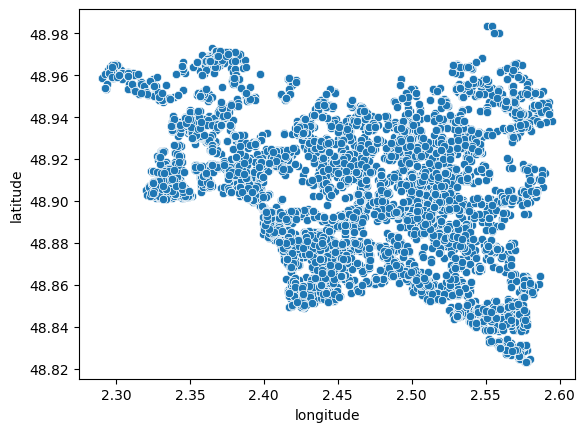

In [29]:
# import folium
# m = folium.Map(location = [-33.8, 151.2], tiles ='OpenStreetMap', zoom_start=11)
import seaborn as sns
sns.scatterplot(x = df_useful['longitude'], y = df_useful['latitude'])

# 🤓 Feature engineering

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Drop Region

In [31]:
#Region information is contained in postal code
df_useful = df_useful.drop(columns='region')

### Living area data has to be preprocessed because living area < 9qm does not make sense

This has to go into the preprocessing steps

In [32]:
'''To legally rent an apartment in France, it must have a minimum ceiling height of 2.2m,
a minimum area of 9m² with a window, a separate bathroom, heating, a water system, and working
drains and gutters. In addition, the building and the apartment must not threaten a tenant's health and safety.'''

#Drop everything below 9qm
df_useful = df_useful[df_useful['living_area'] >= 9]

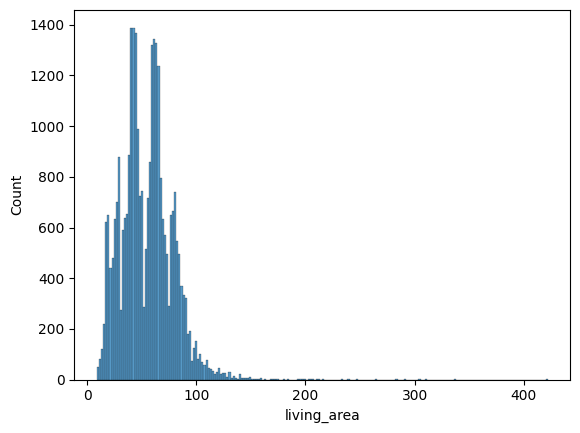

In [33]:
#Check for outliers
sns.histplot(x='living_area', data=df_useful)
plt.show()

In [34]:
df_useful.sort_values(by='living_area', ascending=True).head()

,date,built,price,postal_code,city,property_type,living_area,number_of_rooms,longitude,latitude
145891,2019-02-28,built,140000.0,93400.0,93070,Appartement,9.0,1.0,2.329897,48.902324
144796,2019-02-01,built,38000.0,93210.0,93066,Appartement,9.0,1.0,2.361568,48.907253
17220,2021-11-26,built,164020.0,93300.0,93001,Appartement,9.0,1.0,2.381434,48.913828
34196,2021-05-12,built,15000.0,93600.0,93005,Appartement,9.0,1.0,2.494689,48.931105
245801,2021-05-12,built,15000.0,93600.0,93005,Appartement,9.0,1.0,2.494689,48.931105


In [35]:
df_useful.shape

(30624, 10)

### All columns

In [36]:
df_useful.columns

Index(['date', 'built', 'price', 'postal_code', 'city', 'property_type',
       'living_area', 'number_of_rooms', 'longitude', 'latitude'],
      dtype='object')

In [37]:
df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30624 entries, 61 to 262139
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30624 non-null  datetime64[ns]
 1   built            30624 non-null  object        
 2   price            30624 non-null  float64       
 3   postal_code      30624 non-null  float64       
 4   city             30624 non-null  object        
 5   property_type    30624 non-null  object        
 6   living_area      30624 non-null  float64       
 7   number_of_rooms  30624 non-null  float64       
 8   longitude        30624 non-null  float64       
 9   latitude         30624 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 2.6+ MB


### 'Date' to datetime and 'Year'

In [38]:
#Change to datetime and create a 'year' column

df_useful['date'] = pd.to_datetime(df_useful['date'])
df_useful['year'] = df_useful['date'].dt.year
df_useful['year'].unique()

array([2021, 2018, 2022, 2019, 2020])

### 'Built' - Encoding

In [39]:
#Needs to be encoded in numbers
df_useful['built'] = df_useful['built'].map({'built': 1, 'Vente en l\'état futur d\'achèvement': 0})
df_useful['built'].unique()

array([1, 0])

### 'Price' Viz

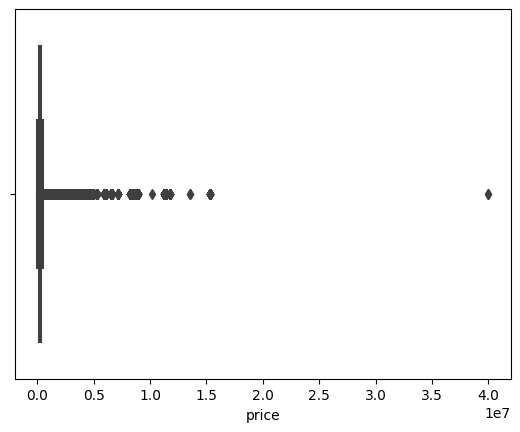

In [40]:
#Check for outliers, 'price' column remains unchanged
sns.boxplot(x='price', data=df_useful)
plt.show()

### Postal Code, City and Region + Property Type

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder

In [42]:
#Postal Code
print(df_useful['postal_code'].value_counts())
df_useful['postal_code'] = df_useful['postal_code'].astype(int) #changed from floats to integers

93160.0    3292
93100.0    2411
93400.0    1859
93200.0    1503
93300.0    1341
93420.0    1193
93500.0    1118
93330.0    1106
93110.0    1076
93220.0    1031
93190.0    1012
93150.0     987
93000.0     844
93130.0     840
93230.0     809
93700.0     714
93600.0     683
93270.0     653
93800.0     636
93140.0     597
93170.0     570
93250.0     527
93210.0     515
93370.0     501
93360.0     490
93120.0     463
93290.0     420
93320.0     408
93380.0     397
93340.0     335
93260.0     321
93350.0     290
93240.0     277
93460.0     273
93310.0     272
93410.0     209
93440.0     204
93450.0     152
93390.0     142
93470.0      82
93430.0      71
Name: postal_code, dtype: int64


In [43]:
#City
print(df_useful['city'].value_counts()) #all good
df_useful['city'] = df_useful['city'].astype(int)

93051    1986
93048    1542
93051    1306
93066    1043
93066     975
         ... 
93014      56
93015      55
93079      40
93079      31
93015      27
Name: city, Length: 80, dtype: int64


In [44]:
#Property type
df_useful['property_type'].unique()
df_useful['property_type'] = df_useful['property_type'].astype(str)

In [45]:
column_transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False), ['postal_code', 'property_type']),
        ('tar', TargetEncoder(), ['city']) #targetencode to keep the number of columns low
    ],
    remainder='passthrough'  # keep non-transformed columns
)

In [46]:
y = df_useful['price']
X = df_useful.drop(columns = 'price')

In [47]:
df_useful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30624 entries, 61 to 262139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             30624 non-null  datetime64[ns]
 1   built            30624 non-null  int64         
 2   price            30624 non-null  float64       
 3   postal_code      30624 non-null  int64         
 4   city             30624 non-null  int64         
 5   property_type    30624 non-null  object        
 6   living_area      30624 non-null  float64       
 7   number_of_rooms  30624 non-null  float64       
 8   longitude        30624 non-null  float64       
 9   latitude         30624 non-null  float64       
 10  year             30624 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 2.8+ MB


In [48]:
df_encoded = pd.DataFrame(column_transformer.fit_transform(X, y), columns=column_transformer.get_feature_names_out())
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '')

In [49]:
df_encoded.head()

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Appartement,ohe__property_type_Maison,tar__city,date,built,living_area,number_of_rooms,longitude,latitude,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,330298.543962,2021-01-04,1,74.0,3.0,2.423187,48.858609,2021
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,361673.693285,2021-01-07,1,42.0,2.0,2.465074,48.887137,2021
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,253069.410518,2021-01-06,1,26.0,1.0,2.455386,48.914226,2021
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,332920.579866,2021-01-11,1,50.0,2.0,2.44052,48.882042,2021
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,259587.133723,2021-01-11,1,53.0,2.0,2.463303,48.913323,2021


### Living Area

In [50]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
df_encoded['living_area_scaled'] = mm_scaler.fit_transform(df_useful[['living_area']])

<AxesSubplot:xlabel='living_area_scaled', ylabel='Count'>

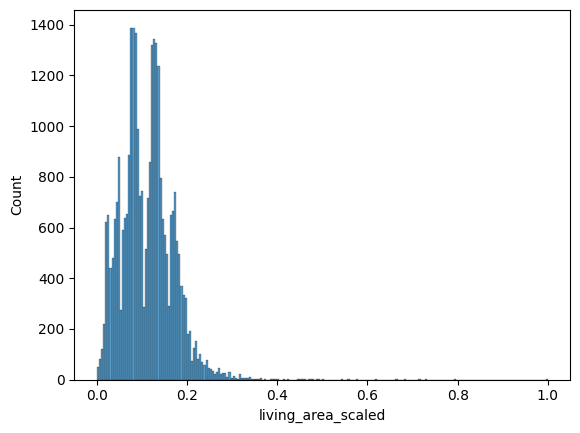

In [51]:
df_encoded.head()
sns.histplot(x='living_area_scaled', data=df_encoded)

In [52]:
# Drop cells
df_encoded = df_encoded.drop(columns='living_area')
df_encoded

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Appartement,ohe__property_type_Maison,tar__city,date,built,number_of_rooms,longitude,latitude,year,living_area_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,330298.543962,2021-01-04,1,3.0,2.423187,48.858609,2021,0.157385
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,361673.693285,2021-01-07,1,2.0,2.465074,48.887137,2021,0.079903
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,253069.410518,2021-01-06,1,1.0,2.455386,48.914226,2021,0.041162
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,332920.579866,2021-01-11,1,2.0,2.44052,48.882042,2021,0.099274
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,259587.133723,2021-01-11,1,2.0,2.463303,48.913323,2021,0.106538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,475061.00367,2021-05-07,0,3.0,2.344616,48.90748,2021,0.140436
30620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,359895.403032,2021-05-11,1,2.0,2.347329,48.937029,2021,0.171913
30621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,177367.985902,2021-05-07,1,4.0,2.379998,48.958582,2021,0.171913
30622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,350397.613692,2021-04-29,1,4.0,2.348916,48.939137,2021,0.186441


### Number of rooms

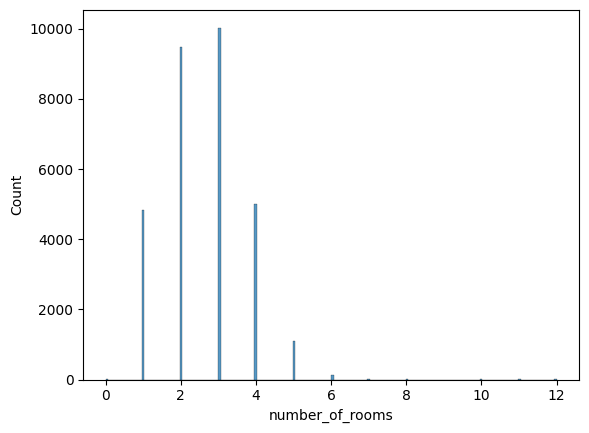

In [53]:
sns.histplot(x='number_of_rooms', data=df_encoded);
plt.show()

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded['number_of_rooms_scaled'] = scaler.fit_transform(df_encoded[['number_of_rooms']])

In [55]:
# Drop cells
df_encoded = df_encoded.drop(columns='number_of_rooms')
df_encoded

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Appartement,ohe__property_type_Maison,tar__city,date,built,longitude,latitude,year,living_area_scaled,number_of_rooms_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,330298.543962,2021-01-04,1,2.423187,48.858609,2021,0.157385,0.250000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,361673.693285,2021-01-07,1,2.465074,48.887137,2021,0.079903,0.166667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,253069.410518,2021-01-06,1,2.455386,48.914226,2021,0.041162,0.083333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,332920.579866,2021-01-11,1,2.44052,48.882042,2021,0.099274,0.166667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,259587.133723,2021-01-11,1,2.463303,48.913323,2021,0.106538,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,475061.00367,2021-05-07,0,2.344616,48.90748,2021,0.140436,0.250000
30620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,359895.403032,2021-05-11,1,2.347329,48.937029,2021,0.171913,0.166667
30621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,177367.985902,2021-05-07,1,2.379998,48.958582,2021,0.171913,0.333333
30622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,350397.613692,2021-04-29,1,2.348916,48.939137,2021,0.186441,0.333333


In [56]:
df_encoded['longitude_scaled'] = mm_scaler.fit_transform(df_encoded[['longitude']])
df_encoded['latitude_scaled'] = mm_scaler.fit_transform(df_encoded[['latitude']])

In [57]:
df_encoded.drop(columns=['longitude', 'latitude'])

,ohe__postal_code_93000,ohe__postal_code_93100,ohe__postal_code_93110,ohe__postal_code_93120,ohe__postal_code_93130,ohe__postal_code_93140,ohe__postal_code_93150,ohe__postal_code_93160,ohe__postal_code_93170,ohe__postal_code_93190,...,ohe__property_type_Appartement,ohe__property_type_Maison,tar__city,date,built,year,living_area_scaled,number_of_rooms_scaled,longitude_scaled,latitude_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,330298.543962,2021-01-04,1,2021,0.157385,0.250000,0.435820,0.220272
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,361673.693285,2021-01-07,1,2021,0.079903,0.166667,0.573234,0.398423
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,253069.410518,2021-01-06,1,2021,0.041162,0.083333,0.541452,0.567587
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,332920.579866,2021-01-11,1,2021,0.099274,0.166667,0.492683,0.366605
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,259587.133723,2021-01-11,1,2021,0.106538,0.166667,0.567424,0.561948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,475061.00367,2021-05-07,0,2021,0.140436,0.250000,0.178061,0.525460
30620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,359895.403032,2021-05-11,1,2021,0.171913,0.166667,0.186961,0.709987
30621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,177367.985902,2021-05-07,1,2021,0.171913,0.333333,0.294135,0.844580
30622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,350397.613692,2021-04-29,1,2021,0.186441,0.333333,0.192167,0.723151


##  🏗️ Making pipeline

In [58]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd

In [60]:
df_clean= pd.read_csv('../raw_data/dvf_full_cleaned.csv')
df_clean.head(5)

/tmp/ipykernel_16137/1009660784.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean= pd.read_csv('../raw_data/dvf_full_cleaned.csv')


,Unnamed: 0,date,built,price,postal_code,city,region,property_type,living_area,number_of_rooms,longitude,latitude
0,35,2022-06-30,built,200000.0,1000,1053,1,Appartement,155.0,4.0,5.224279,46.205820
1,45,2022-06-10,built,252500.0,1630,1401,1,Appartement,49.0,2.0,5.997840,46.253728
2,59,2022-06-21,built,122500.0,1000,1053,1,Appartement,51.0,1.0,5.226737,46.205375
3,71,2022-06-20,built,188600.0,1000,1053,1,Appartement,75.0,3.0,5.229836,46.204833
4,77,2022-06-20,built,188600.0,1000,1053,1,Appartement,109.0,5.0,5.229836,46.204833


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from category_encoders import TargetEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split

In [62]:
# define X and y
X= df_clean.drop(columns=['price'])
y= df_clean['price']

In [63]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [64]:
# Preprocessing numerical data
numeric_transformer = Pipeline([
    #('imputer', SimpleImputer(strategy='mean'),
    ('minmax', MinMaxScaler())
    ])

# Preprocessing categorical data
categorical_transformer = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent'),
    ('onehot', OneHotEncoder(sparse_output=False, dtype=int))
])

# Preprocesing target encoder
targetencoder_transformer = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')
    ('target_enc', TargetEncoder())
])

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, ['living_area', 'number_of_rooms', 'longitude', 'latitude']),
        ('cat', categorical_transformer, ['property_type']),
        ('tar', targetencoder_transformer, ['city', 'postal_code'])
    ])

# preprocessing pipeline
preprocessing_pipeline = Pipeline([('preprocessor', preprocessor)])
preprocessing_pipeline

# Apply  pipeline to  dataset
processed_data = preprocessing_pipeline.fit_transform(X_train, y_train)


# Final pipeline with preprocessing and model
#pipeline = Pipeline([('preprocessor', preprocessor),
                     #('regressor', RandomForestRegressor())])

In [66]:
#df_dvf_pd.read_pickle('../raw_data/train_preproc.pickle')

# 🐝 Model

In [67]:
%load_ext autoreload
%autoreload 2

In [68]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 🔍 KNN 

## Import dataset


In [69]:
import pandas as pd

In [70]:
df_dvf_93_cleaned=pd.read_pickle('../raw_data/dvf_93_cleaned.pkl')

In [71]:
df_dvf_93_cleaned.head()

,postal_code,date,built,price,city,region,property_type,living_area,number_of_rooms,longitude,latitude,nb_of_dep
0,93000.0,2018-07-09,off-plan,252760.4,93008,93,appartment,64.0,3,2.413402,48.919067,1
1,93000.0,2018-07-11,off-plan,138000.0,93008,93,appartment,25.0,1,2.413402,48.919067,0
2,93000.0,2018-07-12,off-plan,228370.0,93008,93,appartment,61.0,3,2.457606,48.902013,1
3,93000.0,2018-07-05,built,127000.0,93008,93,appartment,45.0,2,2.442712,48.908689,1
4,93000.0,2018-07-06,off-plan,277000.0,93008,93,appartment,84.0,4,2.412198,48.916855,1


In [73]:
import sys

#sys.path.append('/home/andre/code/qadnguyen/realdata/prop_value')
#from ml_logic.preprocessor import clean_data

In [74]:
#calling preprocess function from ml_logic
sys.path.append('/home/andre/code/qadnguyen/realdata/prop_value')
from ml_logic.preprocessor import preprocess_data

In [ ]:
#cleaned_df = clean_data(df)

In [75]:
#preprocessing my df_dvf_93_cleaned
processed_df= preprocess_data(df_dvf_93_cleaned)

In [76]:
X_train_preproc, X_test_preproc, y_train, y_test, X_all, y_all, df_full= preprocess_data(df_dvf_93_cleaned)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

# Instanciate the model
knn_model = KNeighborsRegressor()

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X_train_preproc,y_train)

base_knn_score = cv_results['test_score'].mean()

base_knn_score

0.05071315649626766

## 🔍 XGBoost 

In [123]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
model_xgb = XGBRegressor(learning_rate=0.09, max_depth=5, n_estimators=700, reg_alpha = 1.2, reg_lambda= 0.9)

model_xgb.fit(X_train_preproc, y_train)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
y_pred = model_xgb.predict(X_test_preproc)
mse = mean_squared_error(y_pred, y_test)
rmse = mse**(1/2)
print(f'Root Squared Error: {rmse}')#we predict 65.416euros away from the actual price
print(f'Mean Squared Error: {mse}')
print( 'Test score:', model_xgb.score(X_test_preproc, y_test))#our model is able to capture an 88.8% of what is happening in our data
print('Cross val score mean', cross_val_score(model_xgb, X_all, y_all, cv = 5).mean())# 78% of the variance in price is predictable by the model.

Root Squared Error: 65453.1364595065
Mean Squared Error: 4284113072.3867793
Train score: 0.7854104692482439
Cross val score mean 0.7849281775814255


# 🔬 Fine tunning XGBoost 

In [112]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
params = {
#         'xgboost__n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'xgboost__max_depth': trial.suggest_int('max_depth', 5, 20),
#         'xgboost__learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'xgboost__subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'xgboost__colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'xgboost__reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'xgboost__reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#     }

In [120]:
#instantiate model
model_xgb = XGBRegressor()

# choose hyperparams
param_grid = {
    #'learning_rate': [0.09, 0.1, 0.2],
    #'n_estimators': [699, 700, 701],
    #'max_depth': [4, 5, 6]
    'reg_alpha': [3, 4, 5],
    'reg_lambda': [0.8, 0.9, 1.0]

    }

#GridSearch
grid_search = GridSearchCV(estimator=model_xgb,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=5,
                           n_jobs=-1)
#fit the X and y train
grid_search.fit(X_train_preproc, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 2/5] END reg_alpha=3, reg_lambda=0.8;, score=-5057915842.670 total time=  10.9s
[CV 4/5] END reg_alpha=3, reg_lambda=0.8;, score=-4394165938.853 total time=  11.0s
[CV 1/5] END reg_alpha=3, reg_lambda=0.8;, score=-4326558311.987 total time=  11.0s
[CV 3/5] END reg_alpha=3, reg_lambda=0.8;, score=-4578564007.799 total time=  11.5s
[CV 5/5] END reg_alpha=3, reg_lambda=0.8;, score=-4417840380.475 total time=   7.6s
[CV 2/5] END reg_alpha=3, reg_lambda=0.9;, score=-5028770994.473 total time=   7.6s
[CV 1/5] END reg_alpha=3, reg_lambda=0.9;, score=-4215451942.466 total time=   7.9s
[CV 3/5] END reg_alpha=3, reg_lambda=0.9;, score=-4585770053.875 total time=   7.6s
[CV 4/5] END reg_alpha=3, reg_lambda=0.9;, score=-4451212860.145 total time=   5.9s
[CV 5/5] END reg_alpha=3, reg_lambda=0.9;, score=-4452625864.117 total time=   5.9s
[CV 1/5] END reg_alpha=3, reg_lambda=1.0;, score=-4262768242.671 total time=   5.7s
[CV 2/5] END reg_alpha=3, reg_lambda=1.0;, score=-5051370009.794 total time=

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [3, 4, 5], 'reg_lambda': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=5)

In [121]:
# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'reg_alpha': 5, 'reg_lambda': 1.0}


# 🎢 Leaning curve

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have your X_train, y_train, X_test, and y_test data prepared

# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Fit the model with evaluation set
eval_set = [(X_train_preproc, y_train), (X_test_preproc, y_test)]
xgb_regressor.fit(X_train_preproc, y_train, eval_set=eval_set, eval_metric="rmse", verbose=True)

# Extract training and validation loss from the model's history
results = xgb_regressor.evals_result()
train_loss = results['validation_0']['rmse']
test_loss = results['validation_1']['rmse']

# Plot the train and test loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Loss (XGBoost)')
plt.legend()
plt.grid()
plt.show()

# 🐈 CatBoost model --> not good

In [104]:
pip install catboost

  Using cached catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Using cached catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl (98.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor
model_cat = CatBoostRegressor()

# Fit model
model_cat.fit(X_train_preproc, y_train)

# Get predictions
y_pred = model_cat.predict(X_test_preproc)
mse = mean_squared_error(y_pred, y_test)
rmse = mse**(1/2)
print(f'Root Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')
print( 'Train score:', model_cat.score(X_train_preproc, y_train))
print('Cross val score mean', cross_val_score(model_cat, X_train_preproc, y_train, cv = 5).mean())

In [106]:
print(f'Root Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')
print( 'Train score:', model_cat.score(X_train_preproc, y_train))
print('Cross val score mean', cross_val_score(model_cat, X_train_preproc, y_train, cv = 5).mean())

Root Squared Error: 65722.28473231786
Mean Squared Error: 4319418710.435862
Train score: 0.8429812391745768
Learning rate set to 0.06529
0:	learn: 137145.6833989	total: 21.4ms	remaining: 21.3s
1:	learn: 132014.8319371	total: 31.6ms	remaining: 15.7s
2:	learn: 127164.9518129	total: 39.6ms	remaining: 13.2s
3:	learn: 122619.3844520	total: 48.3ms	remaining: 12s
4:	learn: 118572.7248646	total: 60.2ms	remaining: 12s
5:	learn: 114796.1675471	total: 63.6ms	remaining: 10.5s
6:	learn: 111395.8794067	total: 76.5ms	remaining: 10.9s
7:	learn: 108128.7878921	total: 82.9ms	remaining: 10.3s
8:	learn: 105343.8006705	total: 105ms	remaining: 11.6s
9:	learn: 102711.6683115	total: 128ms	remaining: 12.6s
10:	learn: 100376.1495586	total: 131ms	remaining: 11.8s
11:	learn: 98019.3069169	total: 146ms	remaining: 12s
12:	learn: 95902.3526303	total: 164ms	remaining: 12.5s
13:	learn: 93985.7757219	total: 169ms	remaining: 11.9s
14:	learn: 92176.4255459	total: 176ms	remaining: 11.6s
15:	learn: 90606.2129161	total: 187

# 🥅 Elactic neet model --> not good

In [107]:
from sklearn.linear_model import ElasticNet
# Initialize CatBoostRegressor
model_elastic = ElasticNet()

# Fit model
model_elastic.fit(X_train_preproc, y_train)

# Get predictions
y_pred = model_elastic.predict(X_test_preproc)
mse = mean_squared_error(y_pred, y_test)
rmse = mse**(1/2)
print(f'Root Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')
print( 'Train score:', model_cat.score(X_train_preproc, y_train))
print('Cross val score mean', cross_val_score(model_cat, X_train_preproc, y_train, cv = 5).mean())

Root Squared Error: 92209.17076242898
Mean Squared Error: 8502531172.694789
Train score: 0.8429812391745768
Learning rate set to 0.06529
0:	learn: 137145.6833989	total: 6.23ms	remaining: 6.23s
1:	learn: 132014.8319371	total: 19ms	remaining: 9.5s
2:	learn: 127164.9518129	total: 22.2ms	remaining: 7.39s
3:	learn: 122619.3844520	total: 37.6ms	remaining: 9.35s
4:	learn: 118572.7248646	total: 41.4ms	remaining: 8.23s
5:	learn: 114796.1675471	total: 46.2ms	remaining: 7.65s
6:	learn: 111395.8794067	total: 56.6ms	remaining: 8.03s
7:	learn: 108128.7878921	total: 60.1ms	remaining: 7.45s
8:	learn: 105343.8006705	total: 70.8ms	remaining: 7.8s
9:	learn: 102711.6683115	total: 75.3ms	remaining: 7.45s
10:	learn: 100376.1495586	total: 93ms	remaining: 8.36s
11:	learn: 98019.3069169	total: 107ms	remaining: 8.85s
12:	learn: 95902.3526303	total: 114ms	remaining: 8.65s
13:	learn: 93985.7757219	total: 119ms	remaining: 8.38s
14:	learn: 92176.4255459	total: 123ms	remaining: 8.09s
15:	learn: 90606.2129161	total: 

## Data

In [ ]:
#Data is called df_dvf, to be renamed into data
data = df_dvf

X = data.drop(columns=['price'])
y = data['price']

In [ ]:
col_names = ['date', 'built', 'price', 'postal code',
                'city', 'region', 'number of units', 'property type',
                'built area', 'number of rooms', 'land area',
                'longitude', 'latitude']

col_names = ['date', 'built', 'price', 'postal_code',
                'city', 'region', 'number_of_units', 'property_type',
                'living_area', 'number_of_rooms',
                'longitude', 'latitude']

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X =
y =
X_scaled = scaler.fit_transform(X)

# Convert X_scaled (np array) back to a DataFrame with column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate into one dataframe with review_score
scaled_orders = pd.concat([X_scaled, y], axis=1)


SyntaxError: invalid syntax (2538177552.py, line 4)

## Correlation

In [ ]:
plt.figure(figsize = (10,10))

sns.heatmap(
    data.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

## 🐧 Linear Regression

### Univariate Regression

In [ ]:
import statsmodels.formula.api as smf

model_uni = smf.ols(formula='price ~ land_area', data=data).fit()
model_uni.rsquared

model_uni.summary()

### Multivariate Regression

In [ ]:
import statsmodels.formula.api as smf

model_mul = smf.ols(formula='price ~ land_area + number_of_units', data=data).fit()
model_mul.rsquared

model_mul.summary()

#### Important feature identification

In [ ]:
model_mul.params.drop('Intercept')

coefficients = model_mul.params
coefficients = coefficients.drop('Intercept')
plt.bar(coefficients.index, coefficients)
plt.title('Important features correlating with review_score, p = 0.04')

#### Model Performance

In [ ]:
#Residual computation (should be close to 0)
n = len(X_std)
predicted_values = model_mul.predict()
residuals = X_std['price'] - predicted_values
residuals.std() / X_std.wait_time.std() / (n-2)**0.5

#Root Mean Squared Error
rmse = np.sqrt(np.mean(residuals**2))
rmse

#Plot residuals
sns.histplot(residuals, kde=True, edgecolor='w')
plt.title('Residuals')

### Linear Regression with ML

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

## 🐓 KNN Regression

## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('Train score:', model.score(X_test, y_test))
print('Cross val score mean', cross_val_score(model, X_train, y_train, cv = 5).mean())

## 🐬 Ensemble Model: (XGBoost recomm)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print( 'Train score:', model.score(X_test, y_test))
print('Cross val score mean', cross_val_score(model, X_train, y_train, cv = 5).mean())

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

model.fit(X_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print( 'Train score:', model.score(X_test, y_test))
print('Cross val score mean', cross_val_score(model, X_train, y_train, cv = 5).mean())

## 🐇 Optional: Deep Learning